# Graph algorithms

Graphs are incredibly versatile data structures and due to this versatility they are ubiquitous in computing.

## Adjacency list

Besides the adjacency matrix representation of a graph which we cover [here](../../mathematics/discrete-math/graph_theory.ipynb) the other common way of representing a graph is using an adjacency list which {cite:p}`cormen2022introduction` say is what most of the graph algorithms they present use to represent graphs. For example for the graph $G$ shown below:

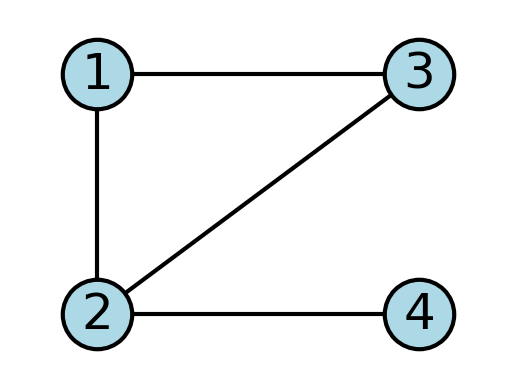

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

def get_full_adjlist(G, delimiter=" "):
     for s, nbrs in G.adjacency():
        line = str(s) + delimiter
        for t, data in nbrs.items():
                line += str(t) + delimiter
        yield line[: -len(delimiter)]


def adjlist_as_dict(G):
    adj_lst = {}
    for line in get_full_adjlist(G):
        nodes = line.split(" ")
        s = nodes[0]
        neighbors = nodes[1:]
        adj_lst[f"Node {s}"] = neighbors
    return adj_lst


options = {
    "font_size": 36,
    "node_size": 2500,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "font_family": "sans"
}

G = nx.Graph()
V = [1,2,3,4]
E = [(1,2), (2,3), (1,3), (2,4)]
G.add_nodes_from(V)
G.add_edges_from(E)

# explicitly set node positions
pos = {1: (0, 0), 2: (0, -1), 3: (1, 0), 4: (1, -1) }
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

The adjacency list is given by

In [50]:
adj_lst = adjlist_as_dict(G)

print(tabulate(adj_lst, headers="keys", tablefmt='fancy_grid'))

╒══════════╤══════════╤══════════╤══════════╕
│   Node 1 │   Node 2 │   Node 3 │   Node 4 │
╞══════════╪══════════╪══════════╪══════════╡
│        2 │        1 │        2 │        2 │
├──────────┼──────────┼──────────┼──────────┤
│        3 │        3 │        1 │          │
├──────────┼──────────┼──────────┼──────────┤
│          │        4 │          │          │
╘══════════╧══════════╧══════════╧══════════╛


## Graph traversal

### Depth first search (DFS)

DFS explores the graph in a depth first manner meaning it explores all edges to unexplored edges from a given node before backtracking to the node it started on once it reaches a node that has no edges that lead to unexplored edges. Uses a stack.

Runtime is $O(|V|+|E|)$

CAn be used to find connected components. Will label each node with it's connected component number. When used on a DAG it returns a topological ordering of the nodes so can be used to topologically sort a graph.

```{prf:algorithm} Explore
:class: dropdown
:label: explore
**procedure** $\text{Explore}(G, v,$ visited$)$:

**Inputs** Given a graph $G=(V,E)$, a node $v$ and a list of booleans, visited, which indicate which nodes have been visited 

**Output** Nothing but visited($w$) is set to $\text{True}$ for all nodes, $w$, which are reachable from $v$

1. visited($w$) = $\text{True}$
2. $\text{previsit}(v)$
3. for each edge $(u,v) \in E$:
   1. if visited($u$) == $\text{False}$:
      1. $\text{Explore}$($G$, $u$)
4. $\text{postvisit}(v)$
```

```{prf:algorithm} Depth First Search
:class: dropdown
:label: dfs
**procedure** $\text{DFS}(G)$:

**Inputs** Given a graph $G=(V,E)$

**Output** A list called visited which contains the pre-order and post-order number of each node computed during the depth first search.

1. for each $v\in V$:
   1. visited($v$) = $\text{False}$
2. for each $v \in V$:
   1. if visited($v$) == $\text{False}$
      1. $\text{Explore}(G,v,$ visited$)$

3. return visited

```

### Breadth first search (BFS)

BFS explores the graph in layers. 
Returns the minimum number of edges one must traverse to get from a starting node $s$ to all other nodes. If there is no path from $s$ to a node $t$ then the minimum number of edges one must traverse is set to $\infty$. BFS utilizes a min heap (also called a priority queue).

Runtime is $O(|V|+|E|)$

## Shortest paths

### Dijkstra's algorithm

Sort of a generalization of BFS but works on weighted graphs where the edge weights are positive. 

Runtime is $O(|V|\log{(|V|)}+|E|\log{(|V|)})$

### Bellman-Ford algorithm

Runtime is $O(|V||E|)$

### Floyd–Warshall algorithm

Runtime is $O(|V|^3)$

## Strongly connected components 

### Kosaraju's algorithm 

This algorithm outputs a meta-graph where the nodes correspond to strongly connected components (SCCs) of the graph $G$ and the edges $(u,v)$ denote that there is a path from all nodes in SCC $u$ to all nodes in SCC $v$. 

Runtime is $O(|V|+|E|)$ which is the same as DFS/BFS since we simply run DFS on $G^R$ and DFS on $G$.

## Minimum spanning trees

The definition of a minimum spanning tree is covered [here](../../mathematics/discrete-math/graph_theory.ipynb) but how can we find the MST of an arbitrary weighted undirected graph?

### Kruskal's algorithm

Runtime is $O(|E|\log{(|V|)})$

### Prim's algorithm

Runtime is $O(|V|\log{(|V|)}+|E|\log{(|V|)})$

## Max flow

### Ford-Fulkerson algorithm 

### Edmonds-Karp algorithm

## Practice problems

### 3.5 Reverse a graph

Given a graph $G=(V,E)$

1) Create a new empty adjacency list $L$. 
2) Iterate over the nodes in the $V$. 
3) When on node $u$ check all of its neighbors. For a given neighbor $w$ add $u$ to the edge list of $w$ in the new adjacency list $L$. 

At the end $L$ will have all edges of $G$ but reversed. This takes $O(|E|+|V|)$ time since we must iterate over all nodes and their respective edges. Not sure if there is a way to do this in-place at the moment.


### 3.15 Computopia

a) To formulate this as a graph problem we represent the intersections in the city as nodes and the streets that connect them as *directed* edges. To solve this problem we just need to show that the graph has exactly 1 strongly connected component i.e. there is a path from intersection $u$ to intersection $v$ and path from intersection $v$ to intersection $u$ for all nodes $u$ and $v$ in the graph. This can be checked using Kosaraju's algorithm to get the meta-graph, which is $O(|V|+|E|)$, and checking that it contains only one node which is $O(1)$. 

b) This is equivalent to saying no matter what node you are on in the graph there is a path to get to node $t$ (the town hall).

### 3.25 Minimum cost node

a)



b)


In [27]:
%load_ext watermark
%watermark -n -u -v -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Sun Sep 29 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

matplotlib: 3.7.4
networkx  : 3.2.1
sympy     : 1.12

